In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from tabulate import tabulate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
import os
print(os.getcwd())

C:\Users\Rutika\Statistical Learning Project\data


In [89]:
#reading train and test data
train = pd.read_csv(r"C:\Users\Rutika\Statistical Learning Project\data\train.csv")
test = pd.read_csv(r"C:\Users\Rutika\Statistical Learning Project\data\test.csv")

In [90]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [91]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
2,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
3,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
4,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


In [92]:
#Add a column to identify the source
train['data_type'] = 'train'
test['data_type'] = 'test'

In [93]:
#Combine datasets for consistent preprocessing
full_data = pd.concat([train, test], ignore_index=True)

In [94]:
full_data.shape

(32561, 16)

In [95]:
#checking columns 
full_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'data_type'],
      dtype='object')

In [96]:
#checking duplicate data
full_data.duplicated().sum()

17

In [97]:
#dropping duplicates
full_data=full_data.drop_duplicates()

In [98]:
full_data.shape

(32544, 16)

In [99]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32544 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32544 non-null  int64 
 1   workclass       32544 non-null  object
 2   fnlwgt          32544 non-null  int64 
 3   education       32544 non-null  object
 4   education-num   32544 non-null  int64 
 5   marital-status  32544 non-null  object
 6   occupation      32544 non-null  object
 7   relationship    32544 non-null  object
 8   race            32544 non-null  object
 9   sex             32544 non-null  object
 10  capital-gain    32544 non-null  int64 
 11  capital-loss    32544 non-null  int64 
 12  hours-per-week  32544 non-null  int64 
 13  native-country  32544 non-null  object
 14  income          32544 non-null  object
 15  data_type       32544 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.2+ MB


In [100]:
full_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32544.000000,3.254400e+04,32544.000000,32544.000000,32544.000000,32544.000000
mean,38.582811,1.897798e+05,10.081828,1078.211775,87.349435,40.436916
std,13.638327,1.055533e+05,2.571421,7387.179736,403.060513,12.349961
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370065e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [101]:
#checking missing values
full_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
data_type         0
dtype: int64

In [102]:
#checking numeric and categoric columns in dataset
numeric_cols = [f for f in full_data.columns if full_data[f].dtype!='O']
print("We have {} numerical features in dataset: {}".format(len(numeric_cols),numeric_cols))
categoric_cols = [f for f in full_data.columns if full_data[f].dtype=='O']
print("We have {} categorical faeatures in dataset: {}".format(len(categoric_cols),categoric_cols))

We have 6 numerical features in dataset: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
We have 10 categorical faeatures in dataset: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income', 'data_type']


In [103]:
# Apply strip() across all categorical columns
full_data[categoric_cols] = full_data[categoric_cols].apply(lambda col: col.str.strip())

In [104]:
for col in categoric_cols:
    # get the unique categories in this column
    unique_vals = full_data[col].unique()               
    count = len(unique_vals)                     

    print(f"There are {count} categories in '{col}' column")
    print(unique_vals.tolist(),"\n")                  

There are 9 categories in 'workclass' column
['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'] 

There are 16 categories in 'education' column
['Bachelors', 'HS-grad', '11th', '9th', 'Masters', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'] 

There are 7 categories in 'marital-status' column
['Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'] 

There are 15 categories in 'occupation' column
['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Tech-support', '?', 'Protective-serv', 'Machine-op-inspct', 'Adm-clerical', 'Priv-house-serv', 'Armed-Forces'] 

There are 6 categories in 'relationship' column
['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-rel

Observations from above:
Columns named 'workclass', 'occupation' and 'country' have '?' as category, so we will replace this '?' with mode of categories in that particular column.

In [105]:
for col in categoric_cols:
    if '?' in full_data[col].values:
        # compute the mode (most frequent value) for this column
        mode_val = full_data[col].mode()[0]
        # replace all '?' entries with the mode
        full_data[col].replace('?', mode_val, inplace=True)

In [106]:
#checking unique values in each column
full_data.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
income                2
data_type             2
dtype: int64

### Exploratory Data Analysis

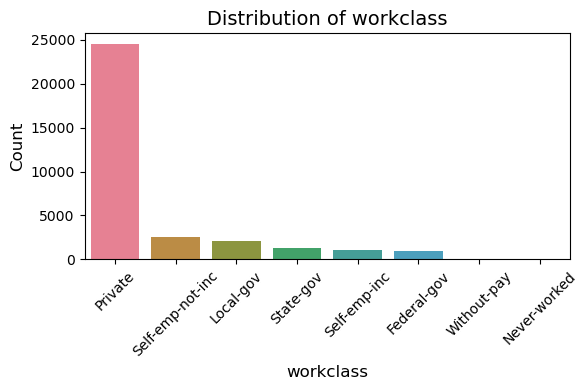

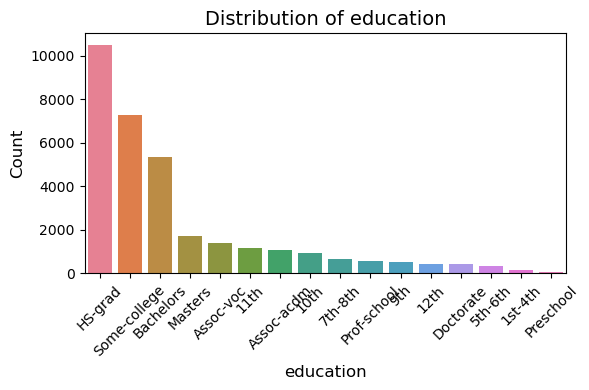

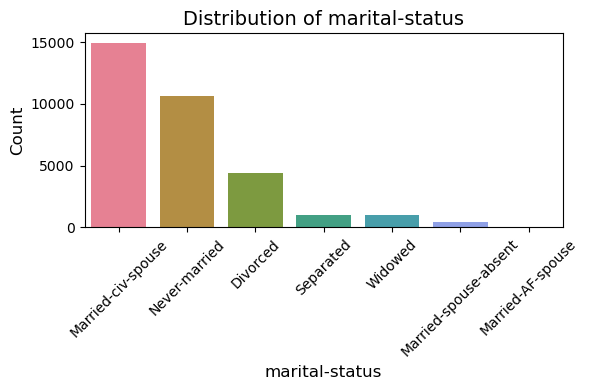

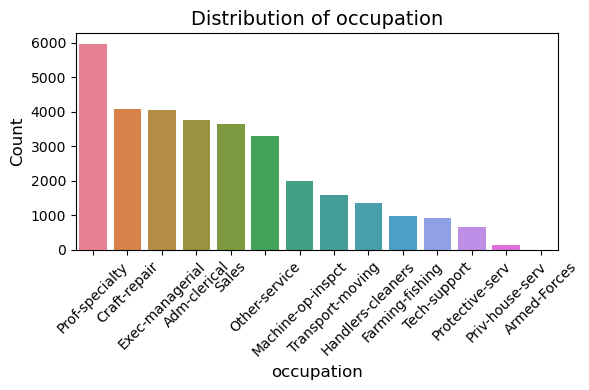

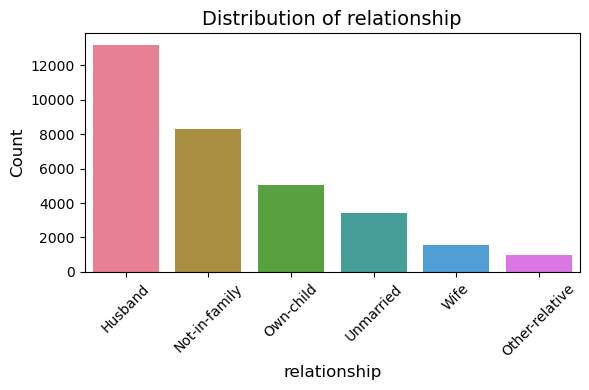

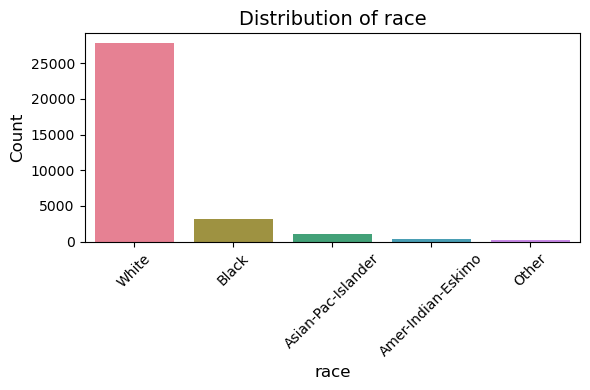

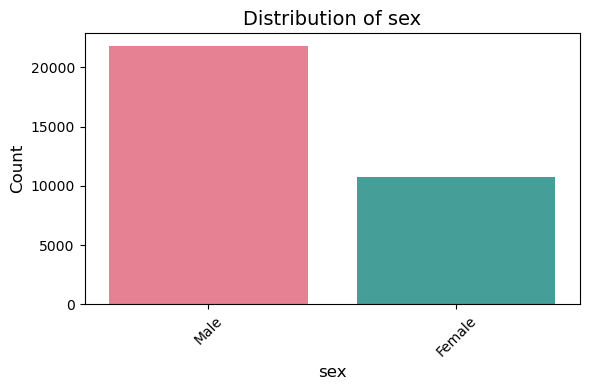

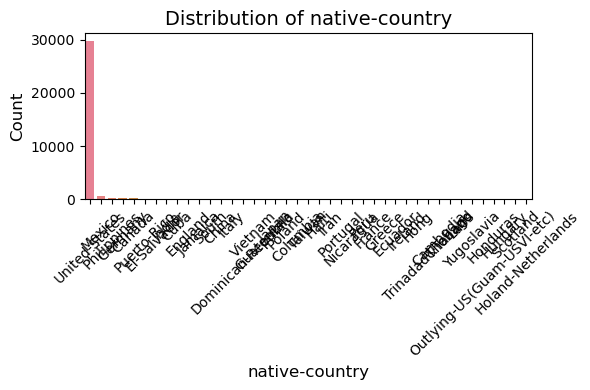

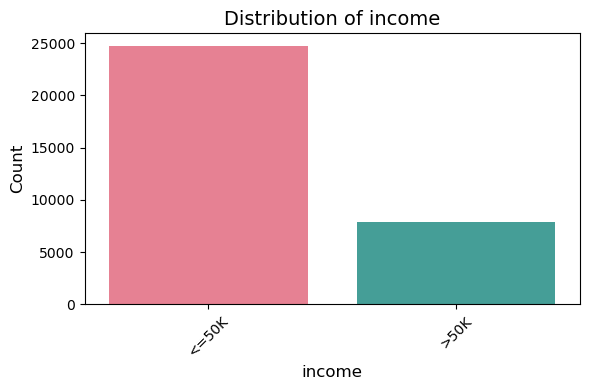

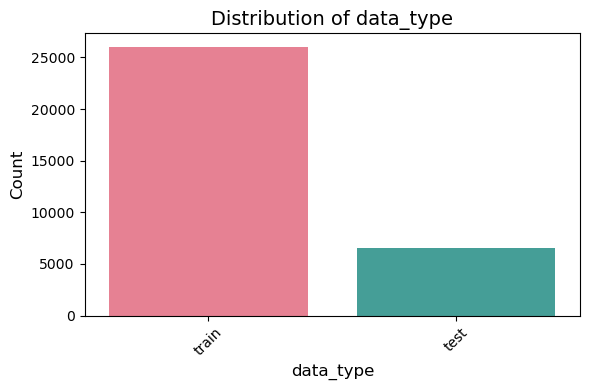

In [107]:
# Define a color palette function for different colors
palette_colors = sns.color_palette("husl", 20) 
for col in categoric_cols:
    plt.figure(figsize=(6, 4))
    
    # Get number of unique categories for that column
    num_categories = full_data[col].nunique()
    
    # Create a palette with unique colors for each bar
    palette = sns.color_palette("husl", num_categories)
    
    sns.countplot(
        data=full_data,
        x=col,
        order=full_data[col].value_counts().index,
        palette=palette
    )
    
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()
    plt.show()

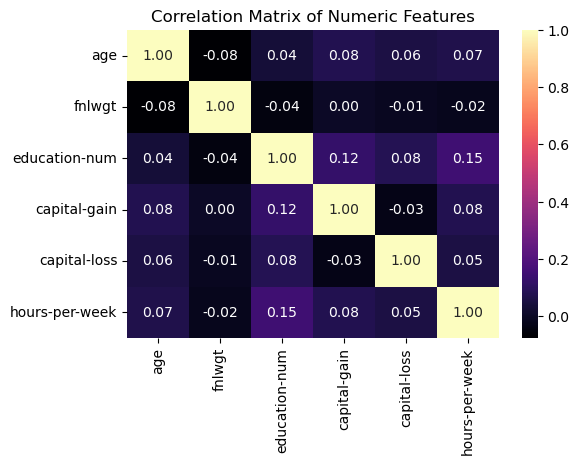

In [108]:
#Compute and plot the correlation matrix for numeric varibales
plt.figure(figsize=(6, 4))
sns.heatmap(full_data.corr(), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

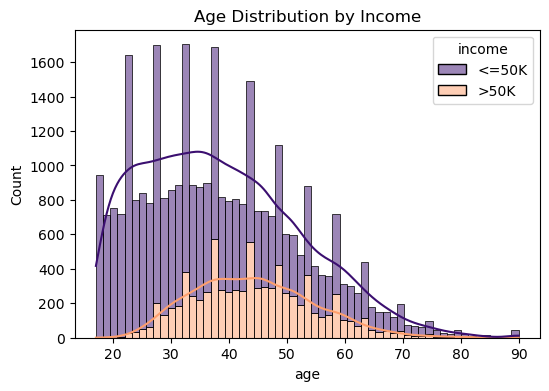

In [109]:
#Age distribution by Income
plt.figure(figsize=(6, 4))
custom_palette = {'<=50K': '#3b0f70', '>50K': '#fe9f6d'}
sns.histplot(data=full_data, x='age', hue='income', multiple='stack', kde=True, palette=custom_palette)
plt.title("Age Distribution by Income")
plt.show()

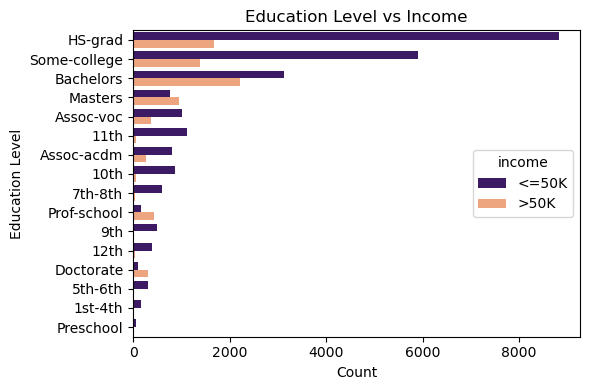

In [110]:
plt.figure(figsize=(6, 4))

# Define custom colors
custom_palette = {
    '<=50K': '#3b0f70',   # Deep Purple
    '>50K': '#fe9f6d'     # Light Orange
}
sns.countplot(
    data=full_data,
    y='education',
    hue='income',
    order=full_data['education'].value_counts().index,
    palette=custom_palette
)
plt.title("Education Level vs Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


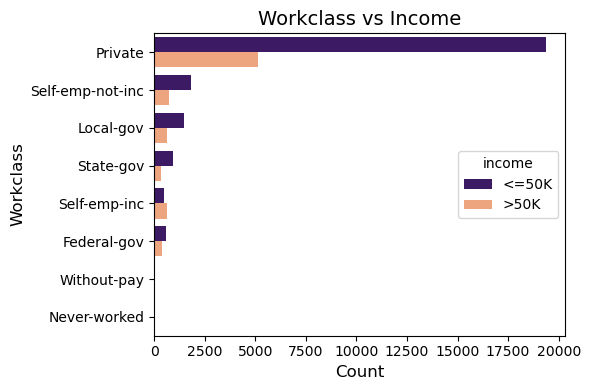

In [111]:
plt.figure(figsize=(6, 4))
# Define custom colors
custom_palette = {
    '<=50K': '#3b0f70',   # Deep Purple
    '>50K': '#fe9f6d'     # Light Orange
}
sns.countplot(
    data=full_data,
    y='workclass',
    hue='income',
    order=full_data['workclass'].value_counts().index,
    palette=custom_palette
)
plt.title("Workclass vs Income", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Workclass", fontsize=12)
plt.tight_layout()
plt.show()

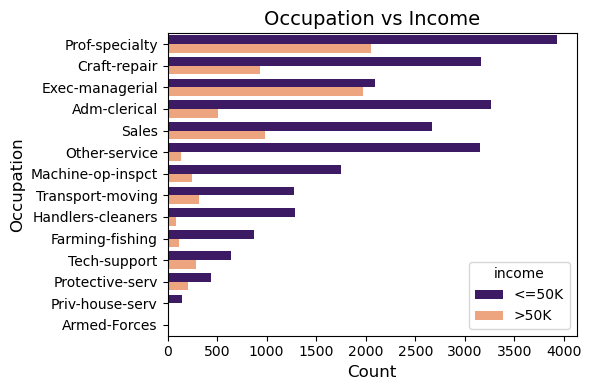

In [112]:
plt.figure(figsize=(6, 4))
# Define custom colors for income classes
custom_palette = {
    '<=50K': '#3b0f70',   # Deep Purple
    '>50K': '#fe9f6d'     # Light Orange
}
sns.countplot(
    data=full_data,
    y='occupation',
    hue='income',
    order=full_data['occupation'].value_counts().index,
    palette=custom_palette
)

plt.title("Occupation vs Income", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.tight_layout()
plt.show()

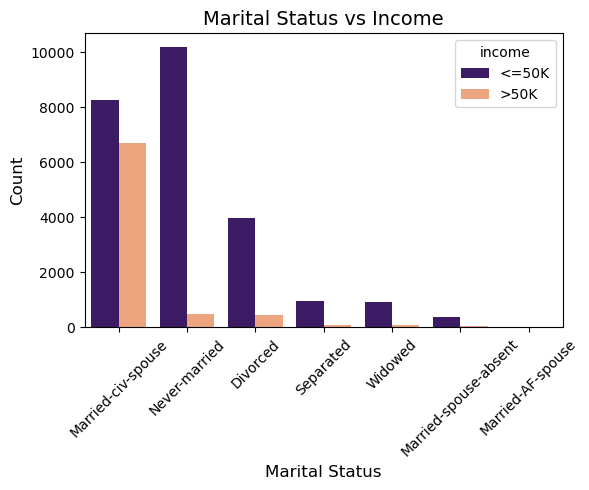

In [113]:
plt.figure(figsize=(6, 5))
# Define custom color palette
custom_palette = {
    '<=50K': '#3b0f70',   # Deep Purple
    '>50K': '#fe9f6d'     # Light Orange
}
sns.countplot(
    data=full_data,
    x='marital-status',
    hue='income',
    order=full_data['marital-status'].value_counts().index,
    palette=custom_palette
)
plt.xticks(rotation=45)
plt.title("Marital Status vs Income", fontsize=14)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


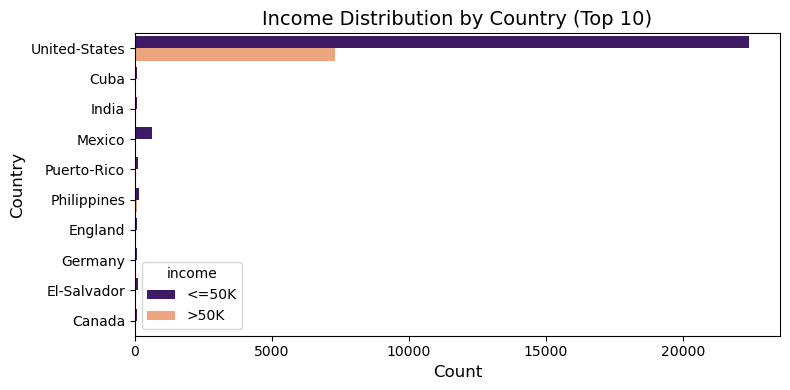

In [114]:
# Get top 10 countries by count
top_countries = full_data['native-country'].value_counts().head(10).index
plt.figure(figsize=(8, 4))
# Define custom color palette
custom_palette = {
    '<=50K': '#3b0f70',   # Deep Purple
    '>50K': '#fe9f6d'     # Light Orange
}
sns.countplot(
    data=full_data[full_data['native-country'].isin(top_countries)],
    y='native-country',
    hue='income',
    palette=custom_palette
)
plt.title("Income Distribution by Country (Top 10)", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

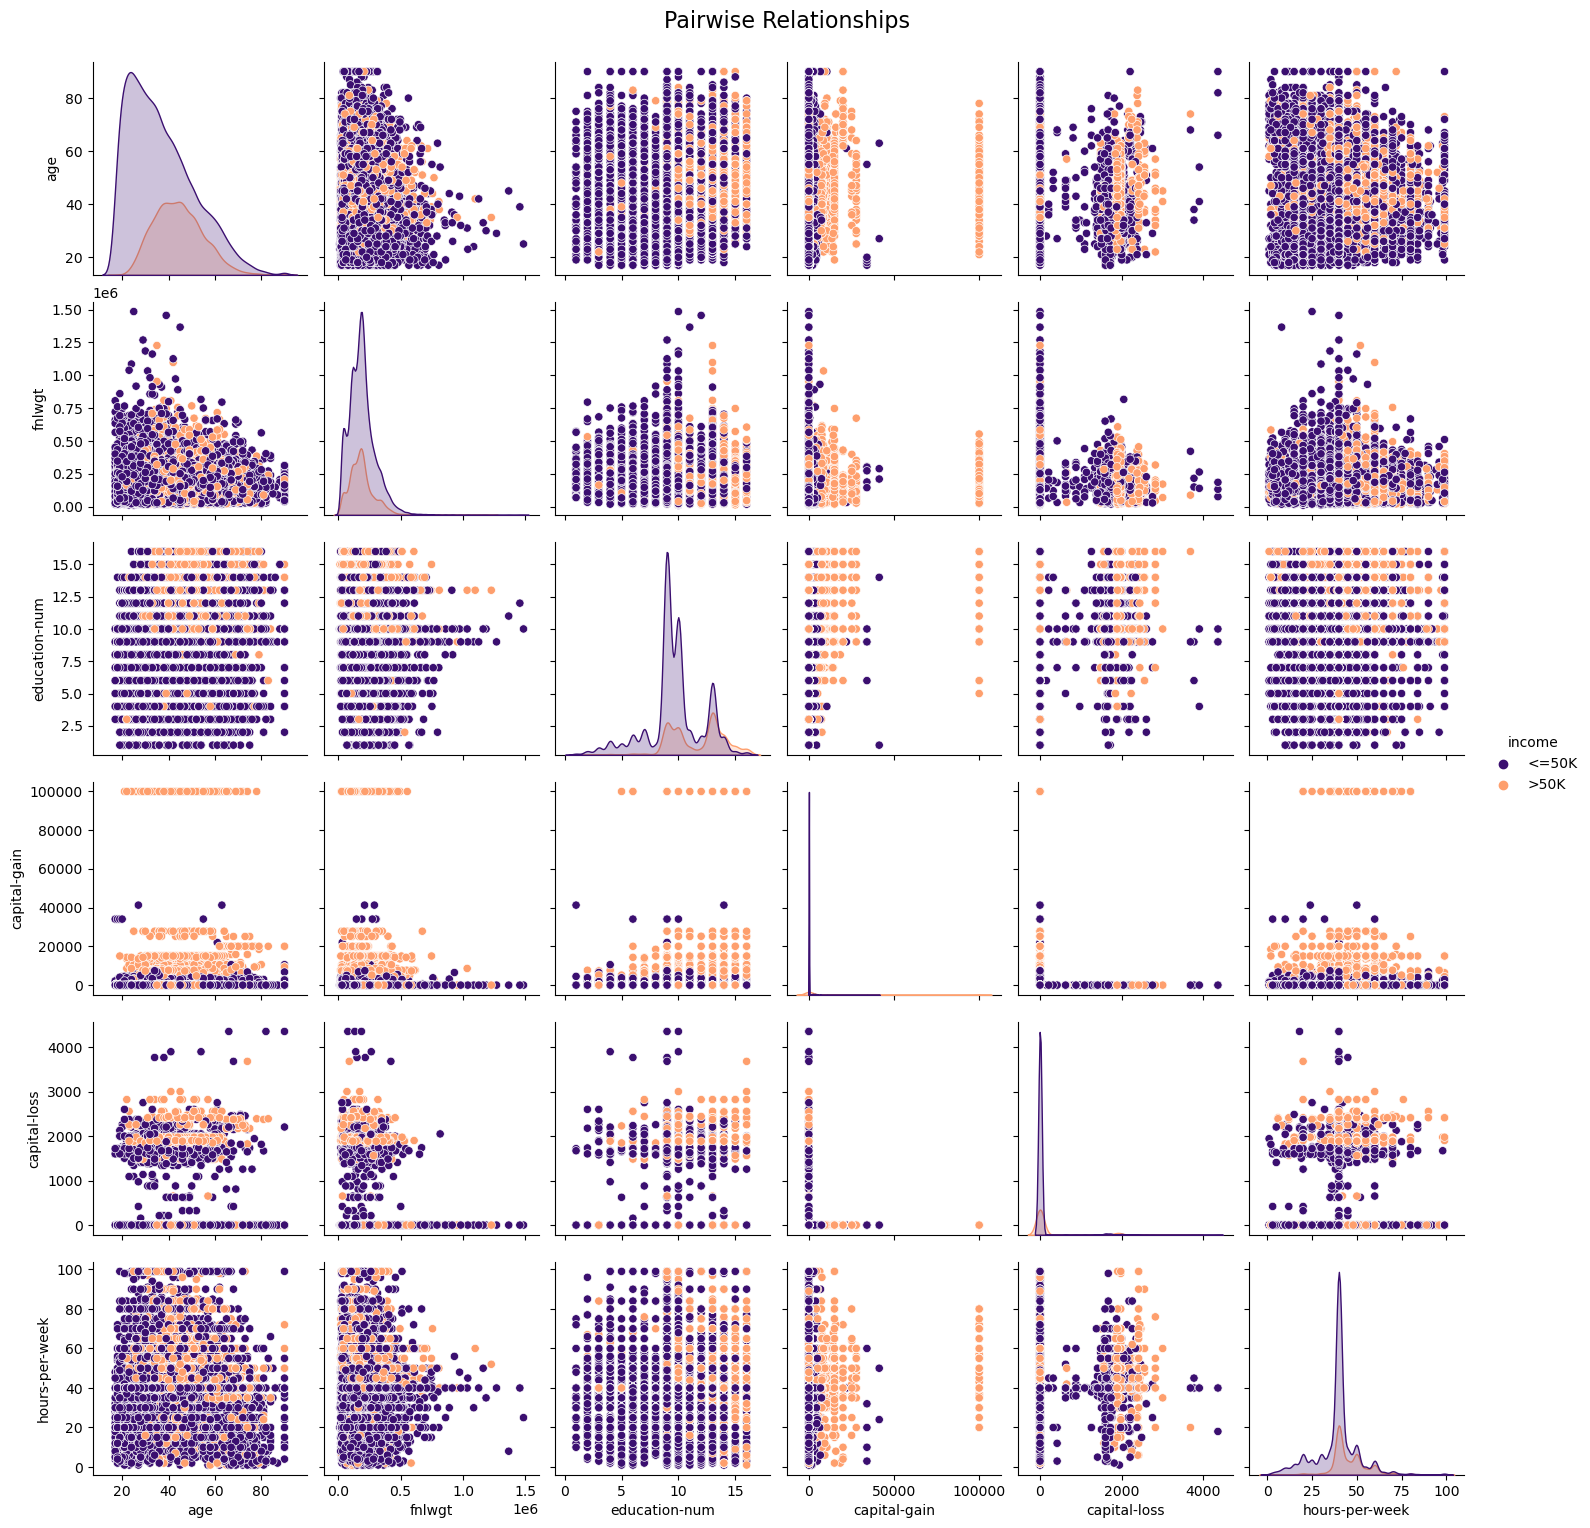

In [115]:
# Define custom palette
custom_palette = {
    '<=50K': '#3b0f70',   
    '>50K': '#fe9f6d'     
}
# Create the pairplot
sns.pairplot(full_data[numeric_cols + ['income']], hue='income', palette=custom_palette)

# Add a title with spacing
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=16)
plt.show()

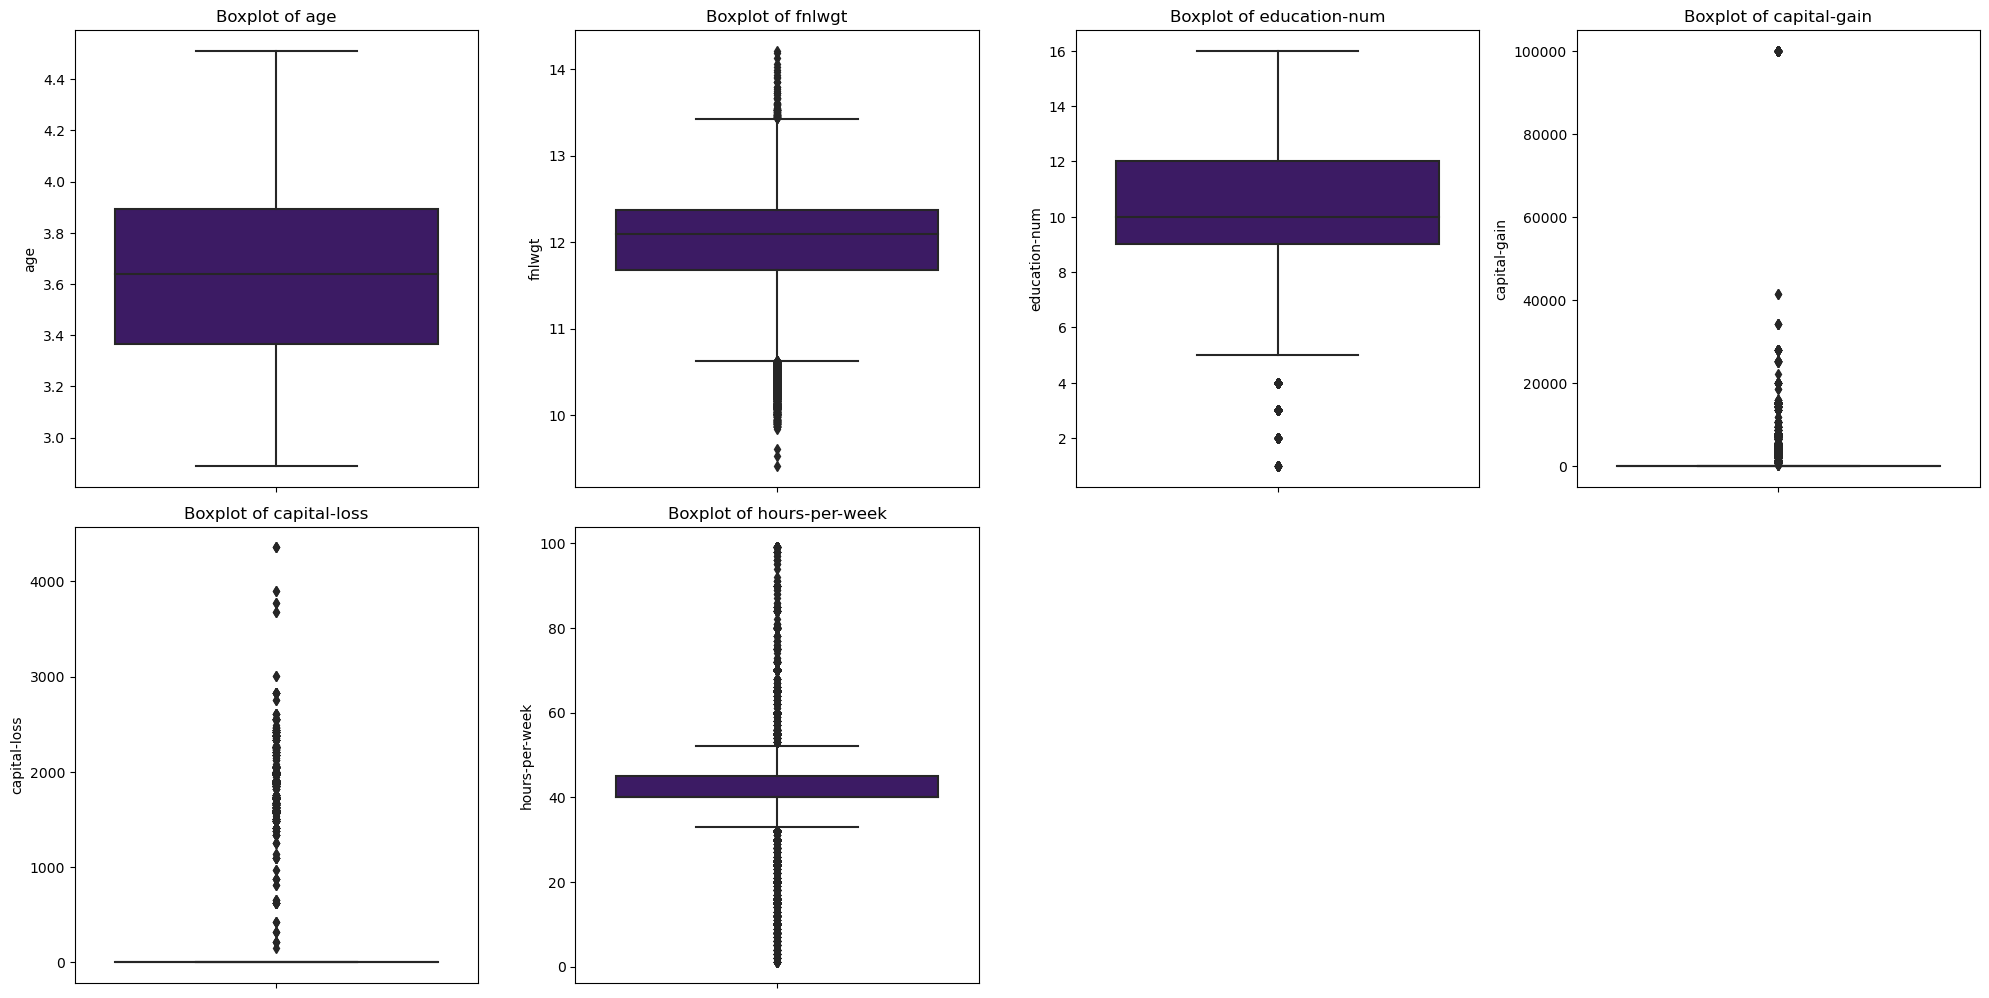

In [122]:
# Create a grid of subplots: adjust nrows/ncols to fit your number of features
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))  # 3×4 grid for up to 12 plots
axes = axes.flatten()  # flatten to 1D array for easy indexing

index = 0
for col in numeric_cols:
    sns.boxplot(y=full_data[col].dropna(), ax=axes[index],color='#3b0f70')
    axes[index].set_title(f"Boxplot of {col}")
    axes[index].set_xlabel("")    # omit x-axis label
    axes[index].set_ylabel(col)
    index += 1

# If there are unused subplots, hide them
for ax in axes[index:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [117]:
#log-transforming 'age' and 'fnlwgt' to address skewness, reduce the effect of outliers, and stabilize variance
full_data['age']=np.log(1+full_data['age'])
full_data['fnlwgt']=np.log(1+full_data['fnlwgt'])

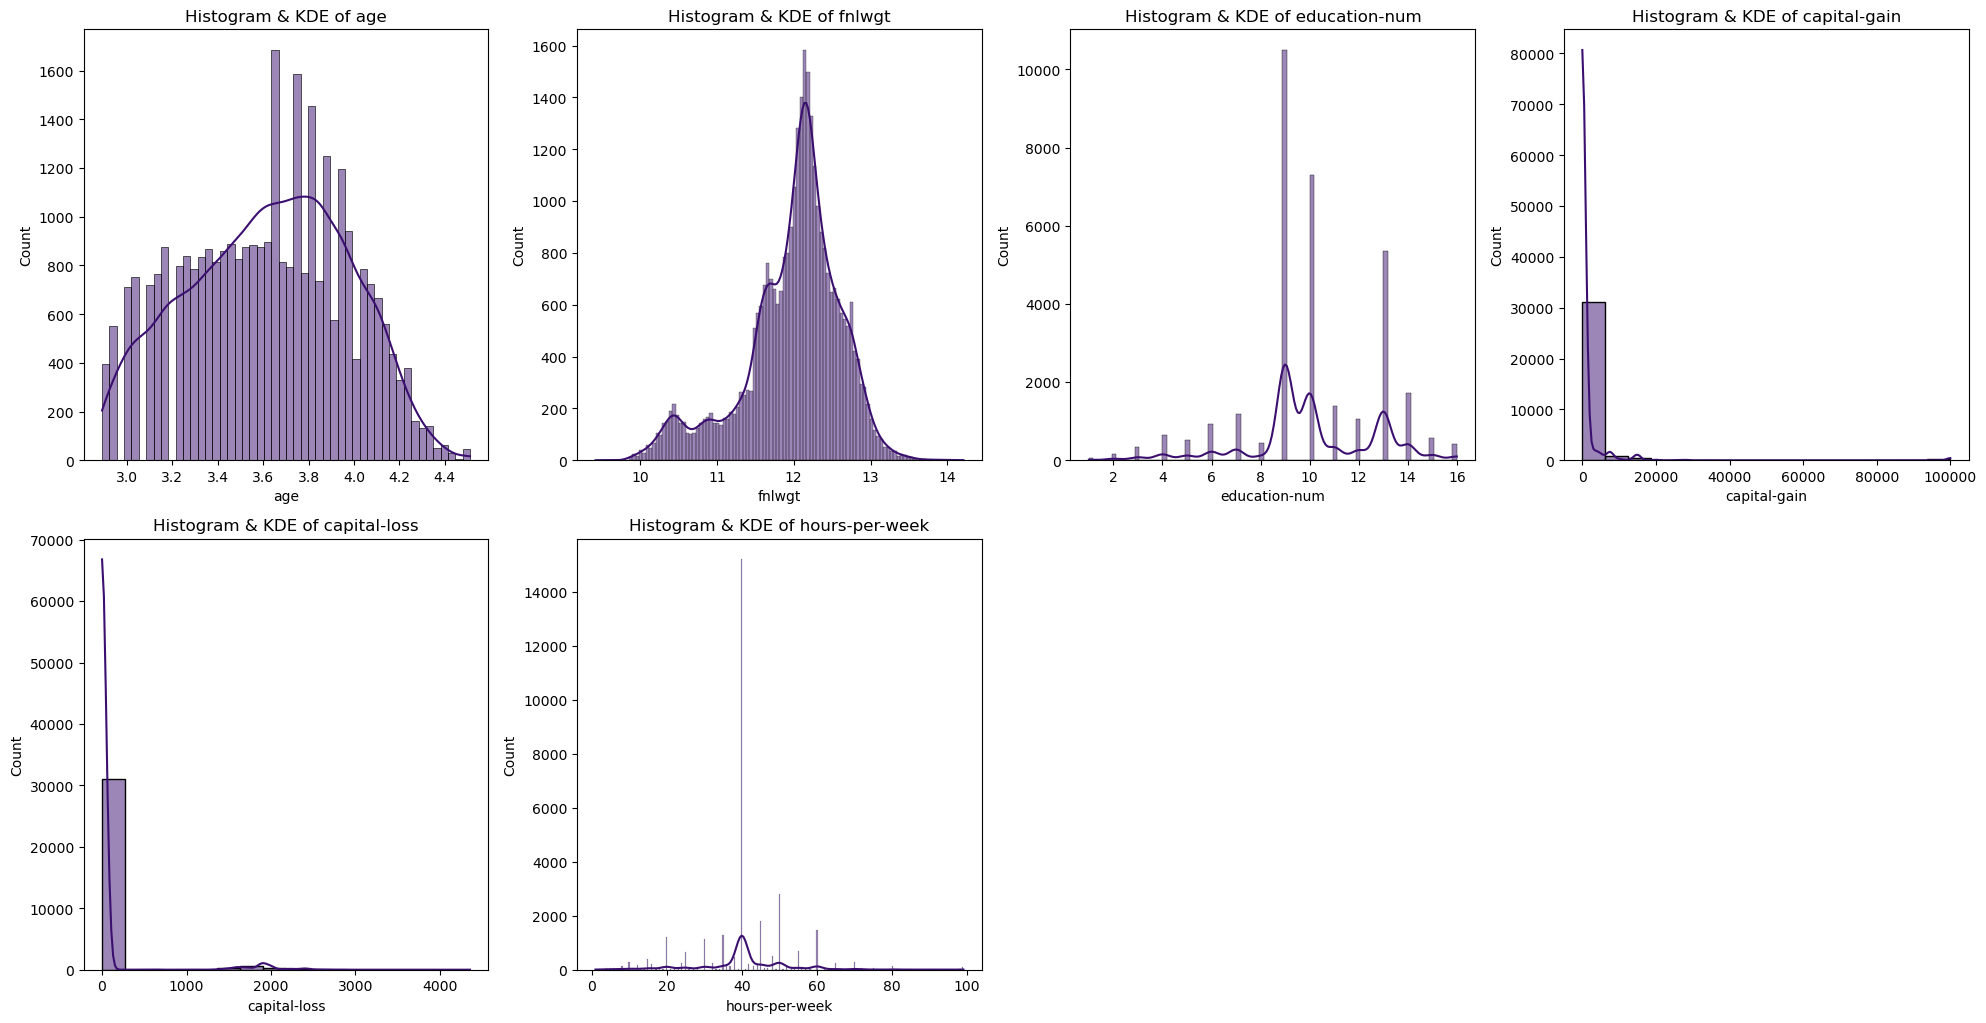

In [121]:
# Create a grid of subplots: 3 rows × 4 columns (adjust if you have fewer/more features)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # flatten to 1D array for easy indexing

index = 0
for col in numeric_cols:
    sns.histplot(data=full_data, x=col, kde=True, ax=axes[index], color='#3b0f70')
    axes[index].set_title(f"Histogram & KDE of {col}")
    axes[index].set_xlabel(col)
    axes[index].set_ylabel("Count")
    index += 1

# Hide any unused subplots
for ax in axes[index:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [56]:
#Label encoding for categorical columns except target variable data_type
#Loop through each column and encode if not excluded
for col in categoric_cols:
    le = LabelEncoder()                        
    full_data[col] = le.fit_transform(full_data[col].astype(str))  

In [57]:
#train_data split 
x = full_data.drop(columns=['income'])
y = full_data['income']

In [58]:
#Initialize the scaler
scaler = StandardScaler()
#Fit on the numerical columns and transform
x[numeric_cols] = scaler.fit_transform(x[numeric_cols])

In [59]:
#Merge features (x) and target (y) into a single DataFrame
merged_data = pd.concat([x, y], axis=1)

#ptional: Check the shape or head of the combined data
print(merged_data.shape)

(32544, 16)


In [60]:
#Filter rows where data_type == 'train' and save to train_df
train_df = merged_data[merged_data['data_type'] == 1]     

#Filter rows where data_type == 'test' and save to test_df
test_df  = merged_data[merged_data['data_type'] == 0]        

#Drop the helper column if you don't need it in the output
train_df = train_df.drop(columns='data_type')
test_df  = test_df.drop(columns='data_type')

#Write each subset back to its own CSV
train_df.to_csv(r'C:\Users\Rutika\Statistical Learning Project\data\train_cleaned.csv', index=False)  
test_df.to_csv(r'C:\Users\Rutika\Statistical Learning Project\data\test_cleaned.csv',  index=False)

### Model Training

Reading cleaned and preprocessed data.

In [4]:
train_data = pd.read_csv(r"C:\Users\Rutika\Statistical Learning Project\data\train_cleaned.csv")
test_data = pd.read_csv(r"C:\Users\Rutika\Statistical Learning Project\data\test_cleaned.csv")

In [5]:
train_data.shape

(26033, 15)

In [6]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.895509,5,-1.036089,9,1.134865,2,3,0,4,1,-0.145959,-0.216719,-2.221654,38,0
1,0.129026,3,0.471863,11,-0.420718,0,5,1,4,1,-0.145959,-0.216719,-0.035378,38,0
2,1.058822,3,0.606254,1,-1.198510,2,5,0,2,1,-0.145959,-0.216719,-0.035378,38,0
3,-0.717464,3,1.186344,9,1.134865,2,9,5,2,0,-0.145959,-0.216719,-0.035378,4,0
4,0.838929,3,0.000483,6,-1.976302,3,7,1,2,0,-0.145959,-0.216719,-1.978734,22,0


In [7]:
test_data.shape

(6511, 15)

In [8]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.201364,6,-1.150401,9,1.134865,4,0,1,4,1,0.148339,-0.216719,-0.035378,38,0
1,0.054809,3,0.911671,12,1.523761,2,3,5,4,0,-0.145959,-0.216719,-0.035378,38,0
2,-1.258165,3,-0.427765,9,1.134865,4,0,3,4,0,-0.145959,-0.216719,-0.845110,38,0
3,-0.348280,3,0.244382,11,-0.420718,4,6,4,4,1,-0.145959,-0.216719,-0.035378,38,0
4,-0.526913,0,-1.557817,15,-0.031822,2,0,3,4,1,-0.145959,-0.216719,-0.035378,38,0


In [9]:
#train_data split 
y_train = train_data['income']
x_train = train_data.drop(columns=['income'])

In [10]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.895509,5,-1.036089,9,1.134865,2,3,0,4,1,-0.145959,-0.216719,-2.221654,38
1,0.129026,3,0.471863,11,-0.420718,0,5,1,4,1,-0.145959,-0.216719,-0.035378,38
2,1.058822,3,0.606254,1,-1.198510,2,5,0,2,1,-0.145959,-0.216719,-0.035378,38
3,-0.717464,3,1.186344,9,1.134865,2,9,5,2,0,-0.145959,-0.216719,-0.035378,4
4,0.838929,3,0.000483,6,-1.976302,3,7,1,2,0,-0.145959,-0.216719,-1.978734,22


In [11]:
#test_data split
y_test = test_data['income']
x_test = test_data.drop(columns=['income'])

In [12]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.201364,6,-1.150401,9,1.134865,4,0,1,4,1,0.148339,-0.216719,-0.035378,38
1,0.054809,3,0.911671,12,1.523761,2,3,5,4,0,-0.145959,-0.216719,-0.035378,38
2,-1.258165,3,-0.427765,9,1.134865,4,0,3,4,0,-0.145959,-0.216719,-0.845110,38
3,-0.348280,3,0.244382,11,-0.420718,4,6,4,4,1,-0.145959,-0.216719,-0.035378,38
4,-0.526913,0,-1.557817,15,-0.031822,2,0,3,4,1,-0.145959,-0.216719,-0.035378,38


In [13]:
#before lets check how many values for each class in target variable
y_train.value_counts()

0    19761
1     6272
Name: income, dtype: int64

In [14]:
#Apply RandomOverSampler instead of SMOTE
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [15]:
y_train.value_counts()

0    19761
1    19761
Name: income, dtype: int64

In [79]:
#Define a dictionary of models
models = {
    "Logistic": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}
#Function to train, evaluate and cross-validate models, and return a DataFrame
def evaluate_models(X_train, Y_train, X_test, Y_test, model_dict):
    results = []

    for name, model in model_dict.items():
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        acc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
        cv_score = round(np.mean(cross_val_score(model, X_train, Y_train, cv=10)) * 100, 2)
        sensitivity = round(recall_score(Y_test, Y_pred, pos_label=1) * 100, 2)
        specificity = round(recall_score(Y_test, Y_pred, pos_label=0) * 100, 2)

        results.append({
            "Model": name,
            "Train Accuracy(%)": cv_score,
            "Test Accuracy(%)": acc,
            "Sensitivity(%)": sensitivity,
            "Specificity(%)": specificity
        })

    return pd.DataFrame(results)
#Call the function and store results in a DataFrame
results_df = evaluate_models(x_train, y_train, x_test, y_test, models)

In [81]:
#Sort by Test Accuracy
results_df = results_df.sort_values(by="Test Accuracy(%)", ascending=True).reset_index(drop=True)
#Display results
print(tabulate(results_df, headers='keys', tablefmt='grid'))

+----+---------------+---------------------+--------------------+------------------+------------------+
|    | Model         |   Train Accuracy(%) |   Test Accuracy(%) |   Sensitivity(%) |   Specificity(%) |
+====+===============+=====================+====================+==================+==================+
|  0 | Logistic      |               77.3  |              76.98 |            78.44 |            76.51 |
+----+---------------+---------------------+--------------------+------------------+------------------+
|  1 | Decision Tree |               92.73 |              81.83 |            62.95 |            87.82 |
+----+---------------+---------------------+--------------------+------------------+------------------+
|  2 | XGBoost       |               88.1  |              83.27 |            81.51 |            83.84 |
+----+---------------+---------------------+--------------------+------------------+------------------+
|  3 | Random Forest |               94.06 |              85.32 

### Feature Selection and Modeling

Since we are not getting very good test accuracy for our models, now we will try doing Forward Feature Selection based on StepAIC, which will help us selecting the best subset of features for a classification model.

In [82]:
#function for Forward Feature Selection based on the Akaike Information Criterion(AIC).
import statsmodels.api as sm
import pandas as pd

def forward_selection_aic(X, y):
    remaining_features = list(X.columns)
    selected_features = []
    current_score, best_new_score = float('inf'), float('inf')
    
    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            model = sm.Logit(y, sm.add_constant(X[selected_features + [candidate]])).fit(disp=0)
            aic = model.aic
            scores_with_candidates.append((aic, candidate))
        
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if current_score > best_new_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
        else:
            break

    return selected_features

In [83]:
models = {
    "Logistic": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoost": GradientBoostingClassifier(random_state=42)
}

def classify(model, model_name, data, label):
    # Step 1: Feature Selection using AIC
    selected_features = forward_selection_aic(pd.DataFrame(data), label)
    print(f"\nModel: {model_name}")
    print("\nSelected Features:", selected_features)
    
    X_selected = pd.DataFrame(data)[selected_features]

    # Step 2: Split the selected data
    x_train, x_test, y_train, y_test = train_test_split(X_selected, label, test_size=0.2, random_state=42)

    # Step 3: Train model
    model.fit(x_train, y_train)
    
    # Train Accuracy
    train_accuracy = accuracy_score(y_train, model.predict(x_train)) * 100
    print(f"\nTrain Accuracy: {train_accuracy:.2f}%")
    
    # Step 4: Cross-validation
    score = cross_val_score(model, X_selected, label, cv=10)
    print(f"\nCV Score: {np.mean(score) * 100:.2f}%")

    # Test Accuracy
    test_accuracy = accuracy_score(y_test, model.predict(x_test)) * 100
    print(f"\nTest Accuracy: {test_accuracy:.2f}%")
    
    # Confusion Matrix
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:\n{cm}")
    
    # Sensitivity (Recall for Positive Class)
    y_pred = model.predict(x_test)
    sensitivity = recall_score(y_test, y_pred, pos_label=1) * 100
    print(f"\nSensitivity: {sensitivity:.2f}%")

    # Specificity (Recall for Negative Class)
    specificity = recall_score(y_test, y_pred, pos_label=0) * 100
    print(f"\nSpecificity: {specificity:.2f}%\n")
    print("-------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------")
    
    # Return all metrics except Confusion Matrix
    results = {
        "Train Accuracy": train_accuracy,
        "CV Score": np.mean(score) * 100,
        "Test Accuracy": test_accuracy
    }
    
    return results


In [84]:
# Initialize a list to store the results
results_list = []

# Loop through the models and classify
for model_name, model in models.items():
    result = classify(model, model_name, x_train, y_train)  # Use your data here (x_train, y_train)
    result['Model'] = model_name
    results_list.append(result)



Model: Logistic

Selected Features: ['education-num', 'age', 'capital-gain', 'sex', 'hours-per-week', 'marital-status', 'capital-loss', 'race', 'workclass', 'relationship', 'education', 'fnlwgt']

Train Accuracy: 77.40%

CV Score: 77.40%

Test Accuracy: 77.51%

Confusion Matrix:
[[3030  947]
 [ 831 3097]]

Sensitivity: 78.84%

Specificity: 76.19%

-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

Model: KNN

Selected Features: ['education-num', 'age', 'capital-gain', 'sex', 'hours-per-week', 'marital-status', 'capital-loss', 'race', 'workclass', 'relationship', 'education', 'fnlwgt']

Train Accuracy: 88.94%

CV Score: 84.73%

Test Accuracy: 84.01%

Confusion Matrix:
[[3125  852]
 [ 412 3516]]

Sensitivity: 89.51%

Specificity: 78.58%

-----------------------------------------------------------------------------------

In [85]:
#Convert the results to a DataFrame
results_df = pd.DataFrame(results_list)

#Reorganize columns for better display
results_df = results_df[["Model", "Train Accuracy", "CV Score", "Test Accuracy"]]

#Sort by Test Accuracy in descending order
results_df = results_df.sort_values(by="Test Accuracy", ascending=True)

#Display the results as a table
print(tabulate(results_df, headers='keys', tablefmt='grid'))

+----+---------------+------------------+------------+-----------------+
|    | Model         |   Train Accuracy |   CV Score |   Test Accuracy |
+====+===============+==================+============+=================+
|  0 | Logistic      |          77.4014 |    77.3974 |         77.5079 |
+----+---------------+------------------+------------+-----------------+
|  5 | AdaBoost      |          82.9301 |    82.8323 |         83.1373 |
+----+---------------+------------------+------------+-----------------+
|  6 | GradientBoost |          83.8568 |    83.5813 |         83.7318 |
+----+---------------+------------------+------------+-----------------+
|  1 | KNN           |          88.9363 |    84.7301 |         84.0101 |
+----+---------------+------------------+------------+-----------------+
|  4 | XGBoost       |          89.5784 |    87.3539 |         87.3118 |
+----+---------------+------------------+------------+-----------------+
|  2 | Decision Tree |          99.9842 |    92.733

### Hyperparameter Tuning 

From above table, Random Forest have best accuracy of 92.75, so now we will try to improve its accuracy by employing hyperparameter tuning.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(RandomForestClassifier(n_estimators=100, random_state=42),
                                n_features_to_select=None,
                                direction='forward',
                                scoring='accuracy',
                                cv=10)
sfs.fit(x_train, y_train)

# Get selected features
selected_features = x_train.columns[sfs.get_support()]
print(selected_features)

In [44]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=250, num=10)]
max_depth = [int(x) for x in np.linspace(40, 250, num=10)]

In [45]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [46]:
rf_tuned = RandomForestClassifier(random_state=42)

In [47]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=10, random_state=42)

In [48]:
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 63, 86, 110, 133, 156,
                                                      180, 203, 226, 250],
                                        'n_estimators': [40, 63, 86, 110, 133,
                                                         156, 180, 203, 226,
                                                         250]},
                   random_state=42)

In [49]:
rf_cv.best_score_

0.94114719410564

In [50]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 40}

In [51]:
rf_best = RandomForestClassifier(
    n_estimators=40,
    max_depth=40)

In [52]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=40)

In [53]:
Y_pred_rf_best = rf_best.predict(x_test)

In [54]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 85.06
F1 score: 68.72
